# Analysis of reproducibility
The following notebook will analyze the performance of our models by displaying each models' performance metrics in graphs. 

<img src="https://www.alfadispenser.com/wp-content/uploads/2018/05/Reproducibility-image.jpg" width="70%" align="left"/>

## Imports

In [1]:
import os, glob, json
from matplotlib import pyplot
import numpy as np

## Some code
First, we need to define some functions we will use to display the data in graphs as well as fetch our results from the correct location.

In [2]:
def get_data(modelType: str, normalizationFunctionUsed: str, kernelType = None):
    '''
    Returns array of models performance
    @modelType: SVM|RF|LR
    @normalizationFunctionUsed: norm1|norm2
    '''
    fileName = f"{modelType}/{kernelType}_svm_{normalizationFunctionUsed}_report.json" if kernelType else f"{modelType}/*_{normalizationFunctionUsed}_report.json"
    for file in glob.glob(fileName):
        with open(file, 'r') as jsonFile:
            data = json.load(jsonFile)
        return data[0]
    
def get_metric(data, dataset, metric):
    '''
    Get the metric (AUC, F1, etc...) of a model
    @data: data
    @dataset: train|test
    @metric: auc|f1-score|sensitivity|specificity|ba
    '''
    scores = []
    for model in data:
        score = model[dataset][metric]
        scores.append(score)
    return scores
    
def plot_boxplot(data, labels, title, xlabel, ylabel):
    '''
    Plots the box plot of models and a metric
    '''
    pyplot.boxplot(data, labels=labels, showmeans=True)
    pyplot.title(title)
    pyplot.xlabel(xlabel)
    pyplot.ylabel(ylabel)
    pyplot.show()
    
def display_metrics(data, dataset, title, xlabel, ylabel):
    '''
    Plots BA, AUC, Sensitivity & Specificity for a given model
    '''
    balanced_accuracy = get_metric(data, dataset, "balanced_accuracy")
    auc = get_metric(data, dataset, "auc")
    sensitivity = get_metric(data, dataset, "sensitivity")
    specificity = get_metric(data, dataset, "specificity")
    plot_boxplot([balanced_accuracy, auc, sensitivity, specificity], ["balanced_accuracy", "auc", "sensitivity", "specificity"], title, xlabel, ylabel)
    
def plt_bar_chart(metrics, values, xlabel, ylabel, title):
    '''
    Plot bar chart for model and metric
    '''
    pyplot.barh(metrics, values)
    pyplot.ylabel(ylabel)
    pyplot.xlabel(xlabel)
    pyplot.title(title)
    pyplot.show()

def get_best_model_per_run(data):
    '''
    Gets the best model per cross validation run
    '''
    metricList = []
    for model in data:
        value = model["test"]["specificity"]
        modelNumber = model["modelInfo"]["iteration"]
        metricList.append(value)
        
    modelIndex = metricList.index(max(metricList))
    return data[modelIndex]

# SVM

In the following section, we will analyze the metrics acquired from the SVM model

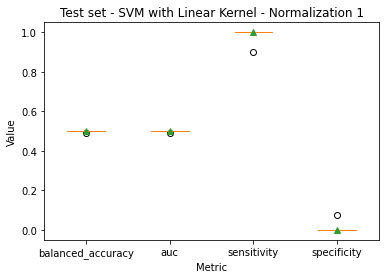

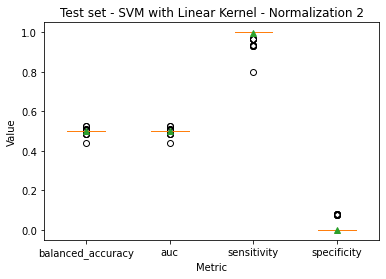

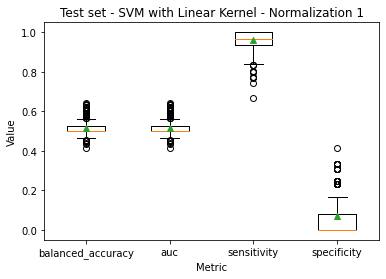

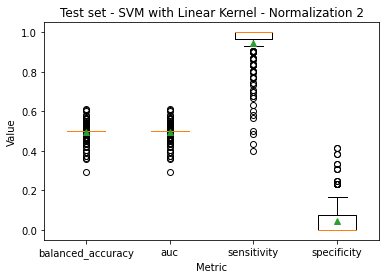

In [3]:
linear_svm_n1_data = get_data("SVM", "norm1", kernelType = "linear")
linear_svm_n2_data = get_data("SVM", "norm2", kernelType = "linear")
rbf_svm_n1_data = get_data("SVM", "norm1", kernelType = "rbf")
rbf_svm_n2_data = get_data("SVM", "norm2", kernelType = "rbf")

display_metrics(linear_svm_n1_data, "test", "Test set - SVM with Linear Kernel - Normalization 1", "Metric", "Value")
display_metrics(linear_svm_n2_data, "test", "Test set - SVM with Linear Kernel - Normalization 2", "Metric", "Value")
display_metrics(rbf_svm_n1_data, "test", "Test set - SVM with Linear Kernel - Normalization 1", "Metric", "Value")
display_metrics(rbf_svm_n2_data, "test", "Test set - SVM with Linear Kernel - Normalization 2", "Metric", "Value")

# Logistic Regression
In the following section, we will analyze the metrics acquired from the Logistic Regression model

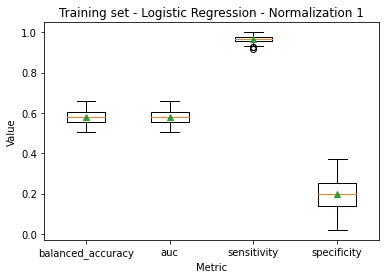

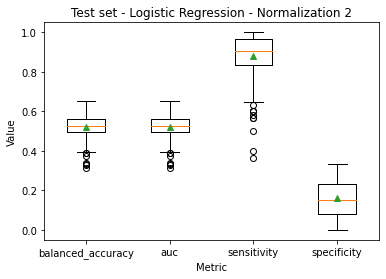

In [4]:
lr_n1_data = get_data("LR", "norm1")
lr_n2_data = get_data("LR", "norm2")

display_metrics(lr_n1_data, "train", "Training set - Logistic Regression - Normalization 1", "Metric", "Value")
display_metrics(lr_n2_data, "test", "Test set - Logistic Regression - Normalization 2", "Metric", "Value")

# Random Forest
In the following section, we will analyze the metrics acquired from the Random Forest model

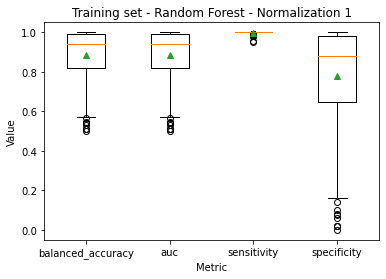

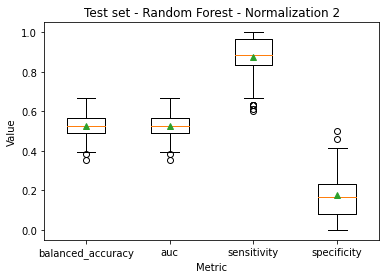

In [5]:
rf_n1_data = get_data("RF", "norm1")
rf_n2_data = get_data("RF", "norm2")

display_metrics(rf_n1_data, "train", "Training set - Random Forest - Normalization 1", "Metric", "Value")
display_metrics(rf_n2_data, "test", "Test set - Random Forest - Normalization 2", "Metric", "Value")

# Cross Validation
In the following section, we will cover every models performance over all iterations.

### Best Performer

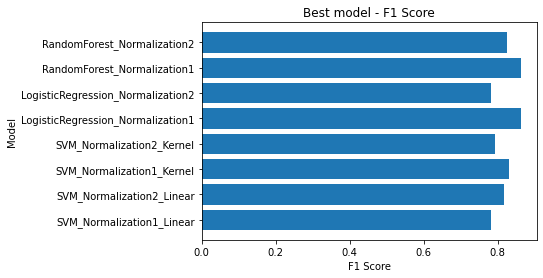

SVM_Normalization1_Linear: 0.7812499999999999
SVM_Normalization2_Linear: 0.7826086956521738
SVM_Normalization1_Kernel: 0.7936507936507936
SVM_Normalization2_Kernel: 0.8169014084507041
LogisticRegression_Normalization1: 0.8253968253968254
LogisticRegression_Normalization2: 0.8307692307692308
RandomForest_Normalization1: 0.8615384615384616
RandomForest_Normalization2: 0.8615384615384616


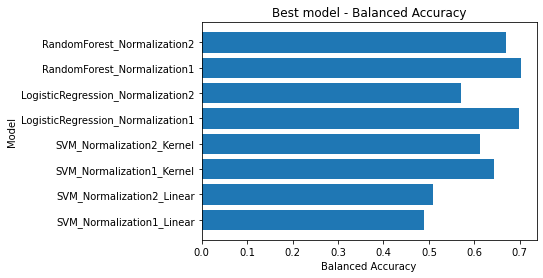

SVM_Normalization1_Linear: 0.4884615384615385
SVM_Normalization2_Linear: 0.5094086021505376
SVM_Normalization1_Kernel: 0.5698924731182795
SVM_Normalization2_Kernel: 0.6115591397849462
LogisticRegression_Normalization1: 0.6438172043010753
LogisticRegression_Normalization2: 0.6693548387096775
RandomForest_Normalization1: 0.6974358974358974
RandomForest_Normalization2: 0.7016129032258065


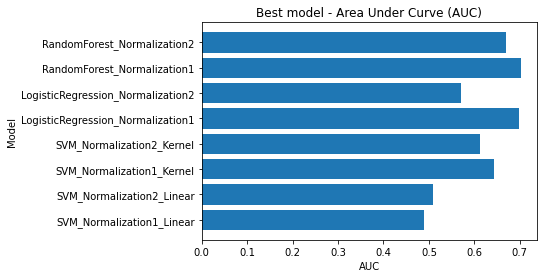

SVM_Normalization1_Linear: 0.48846153846153845
SVM_Normalization2_Linear: 0.5094086021505376
SVM_Normalization1_Kernel: 0.5698924731182795
SVM_Normalization2_Kernel: 0.6115591397849462
LogisticRegression_Normalization1: 0.6438172043010753
LogisticRegression_Normalization2: 0.6693548387096775
RandomForest_Normalization1: 0.6974358974358974
RandomForest_Normalization2: 0.7016129032258065


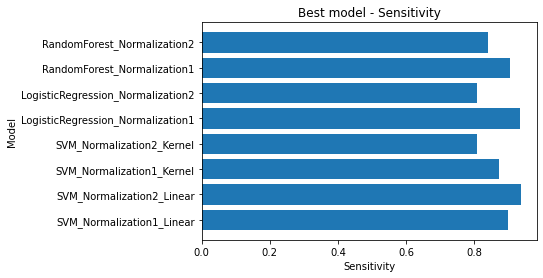

SVM_Normalization1_Linear: 0.8064516129032258
SVM_Normalization2_Linear: 0.8064516129032258
SVM_Normalization1_Kernel: 0.8387096774193549
SVM_Normalization2_Kernel: 0.8709677419354839
LogisticRegression_Normalization1: 0.9
LogisticRegression_Normalization2: 0.9032258064516129
RandomForest_Normalization1: 0.9333333333333333
RandomForest_Normalization2: 0.9354838709677419


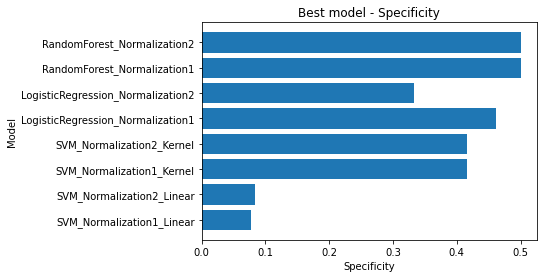

SVM_Normalization1_Linear: 0.07692307692307693
SVM_Normalization2_Linear: 0.08333333333333333
SVM_Normalization1_Kernel: 0.3333333333333333
SVM_Normalization2_Kernel: 0.4166666666666667
LogisticRegression_Normalization1: 0.4166666666666667
LogisticRegression_Normalization2: 0.46153846153846156
RandomForest_Normalization1: 0.5
RandomForest_Normalization2: 0.5


In [6]:
def print_stats(model_names, metric):
    for index, score in enumerate(sorted(metric)):
        print(f"{model_names[index]}: {score}")

# Define models
models = [
    get_best_model_per_run(linear_svm_n1_data),
    get_best_model_per_run(linear_svm_n2_data),
    get_best_model_per_run(rbf_svm_n1_data),
    get_best_model_per_run(rbf_svm_n2_data),
    get_best_model_per_run(lr_n1_data),
    get_best_model_per_run(lr_n2_data),
    get_best_model_per_run(rf_n1_data),
    get_best_model_per_run(rf_n2_data)
]

# Get scores per model
f1_score = [model["test"]["f1_score"] for model in models]
ba = [model["test"]["balanced_accuracy"] for model in models]
auc = [model["test"]["auc"] for model in models]
sensitivity = [model["test"]["sensitivity"] for model in models]
specificity = [model["test"]["specificity"] for model in models]

model_names = [
    "SVM_Normalization1_Linear", 
    "SVM_Normalization2_Linear", 
    "SVM_Normalization1_Kernel", 
    "SVM_Normalization2_Kernel", 
    "LogisticRegression_Normalization1", 
    "LogisticRegression_Normalization2",
    "RandomForest_Normalization1",
    "RandomForest_Normalization2",
]

plt_bar_chart(model_names,f1_score, "F1 Score","Model","Best model - F1 Score")
print_stats(model_names, f1_score)

plt_bar_chart(model_names,ba, "Balanced Accuracy","Model","Best model - Balanced Accuracy")
print_stats(model_names, ba)

plt_bar_chart(model_names,auc, "AUC","Model","Best model - Area Under Curve (AUC)")
print_stats(model_names, auc)

plt_bar_chart(model_names,sensitivity, "Sensitivity","Model","Best model - Sensitivity")
print_stats(model_names, sensitivity)

plt_bar_chart(model_names,specificity, "Specificity","Model","Best model - Specificity")
print_stats(model_names, specificity)

### Mean BA comparasion

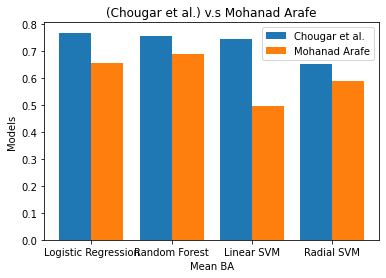

In [7]:
X = ["Logistic Regression", "Random Forest", "Linear SVM", "Radial SVM"]
X_axis = np.arange(len(X))

# These values are taken from the paper and the chart above
original = [0.768, 0.754, 0.745, 0.652]
reproduced = [0.656, 0.69, 0.498, 0.59]

pyplot.bar(X_axis - 0.2, original, 0.4, label = 'Chougar et al.')
pyplot.bar(X_axis + 0.2, reproduced, 0.4, label = 'Mohanad Arafe')
  
pyplot.xticks(X_axis, X)
pyplot.xlabel("Mean BA")
pyplot.ylabel("Models")
pyplot.title("(Chougar et al.) v.s Mohanad Arafe")
pyplot.legend()
pyplot.show()